In [8]:
import zipfile
import os

# Unzipping the provided dataset
with zipfile.ZipFile("/content/animals_sound.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/animals_sound")

# Listing the contents of the extracted directory
contents = os.listdir("/content/animals_sound")
contents

['Animals']

In [10]:
# Listing the contents of the "Animals" directory
animal_contents = os.listdir("/content/animals_sound/Animals")
animal_contents


['bird', 'dog', 'cat']

In [11]:
# Checking the number of audio files in each subfolder and sample file names
file_counts = {}
sample_files = {}

for animal in animal_contents:
    files = os.listdir(f"/content/animals_sound/Animals/{animal}")
    file_counts[animal] = len(files)
    sample_files[animal] = files[:5]  # sample of 5 files for each category

file_counts, sample_files


({'bird': 95, 'dog': 87, 'cat': 145},
 {'bird': ['270bfa52_nohash_0.wav',
   '64da5281_nohash_0.wav',
   '7e783e3f_nohash_0.wav',
   '541e4079_nohash_1.wav',
   '5c39594f_nohash_0.wav'],
  'dog': ['187af8be_nohash_1.wav',
   '17cc40ee_nohash_0.wav',
   '9b027ecf_nohash_0.wav',
   '825f450d_nohash_0.wav',
   '7e2d5caf_nohash_1.wav'],
  'cat': ['89865a6f_nohash_1.wav',
   '66aa0f29_nohash_0.wav',
   'b12bef84_nohash_0.wav',
   '2aa787cf_nohash_2.wav',
   'b2fbe484_nohash_1.wav']})

## Data Cleaning & Preprocessing

Check for any corrupted or unreadable audio files.


In [12]:
import librosa

# Function to load an audio file and return its data and sampling rate
def load_audio(file_path):
    try:
        data, sr = librosa.load(file_path, sr=None)
        return data, sr
    except:
        return None, None

# Checking for corrupted or unreadable audio files
corrupted_files = {}
for animal in animal_contents:
    animal_path = f"/content/animals_sound/Animals/{animal}"
    for file in os.listdir(animal_path):
        file_path = os.path.join(animal_path, file)
        data, sr = load_audio(file_path)
        if data is None or sr is None:
            if animal not in corrupted_files:
                corrupted_files[animal] = []
            corrupted_files[animal].append(file)

corrupted_files


{}

### Properties of the audio files

In [14]:
import wave

def get_audio_properties(file_path):
    """Retrieve properties of an audio file."""
    with wave.open(file_path, 'r') as file:
        n_channels = file.getnchannels()
        sample_width = file.getsampwidth()
        frame_rate = file.getframerate()
        n_frames = file.getnframes()
        duration = n_frames / frame_rate
    return {
        "channels": n_channels,
        "sample_width": sample_width,
        "frame_rate": frame_rate,
        "n_frames": n_frames,
        "duration": duration
    }

# Retrieving audio properties for a few sample files from each category
audio_properties = {}
for animal, samples in sample_files.items():
    audio_properties[animal] = {}
    for sample in samples:
        file_path = os.path.join(f"/content/animals_sound/Animals/{animal}", sample)
        audio_properties[animal][sample] = get_audio_properties(file_path)

audio_properties


{'bird': {'270bfa52_nohash_0.wav': {'channels': 1,
   'sample_width': 2,
   'frame_rate': 16000,
   'n_frames': 16000,
   'duration': 1.0},
  '64da5281_nohash_0.wav': {'channels': 1,
   'sample_width': 2,
   'frame_rate': 16000,
   'n_frames': 16000,
   'duration': 1.0},
  '7e783e3f_nohash_0.wav': {'channels': 1,
   'sample_width': 2,
   'frame_rate': 16000,
   'n_frames': 16000,
   'duration': 1.0},
  '541e4079_nohash_1.wav': {'channels': 1,
   'sample_width': 2,
   'frame_rate': 16000,
   'n_frames': 14861,
   'duration': 0.9288125},
  '5c39594f_nohash_0.wav': {'channels': 1,
   'sample_width': 2,
   'frame_rate': 16000,
   'n_frames': 16000,
   'duration': 1.0}},
 'dog': {'187af8be_nohash_1.wav': {'channels': 1,
   'sample_width': 2,
   'frame_rate': 16000,
   'n_frames': 16000,
   'duration': 1.0},
  '17cc40ee_nohash_0.wav': {'channels': 1,
   'sample_width': 2,
   'frame_rate': 16000,
   'n_frames': 16000,
   'duration': 1.0},
  '9b027ecf_nohash_0.wav': {'channels': 1,
   'sample_

### Checking for Duplicate Audio Files


In [16]:
import hashlib

def compute_file_hash(file_path):
    """Compute the MD5 hash of a file."""
    with open(file_path, 'rb') as file:
        return hashlib.md5(file.read()).hexdigest()

# Computing hashes for all audio files
file_hashes = {}
duplicates = {}

for animal in animal_contents:
    animal_path = f"/content/animals_sound/Animals/{animal}"
    for file in os.listdir(animal_path):
        file_path = os.path.join(animal_path, file)
        file_hash = compute_file_hash(file_path)

        # Check for duplicates based on hash
        if file_hash in file_hashes:
            if file_hash not in duplicates:
                duplicates[file_hash] = [file_hashes[file_hash]]
            duplicates[file_hash].append(file_path)
        else:
            file_hashes[file_hash] = file_path

duplicates


{}

### Visualization & Statistics

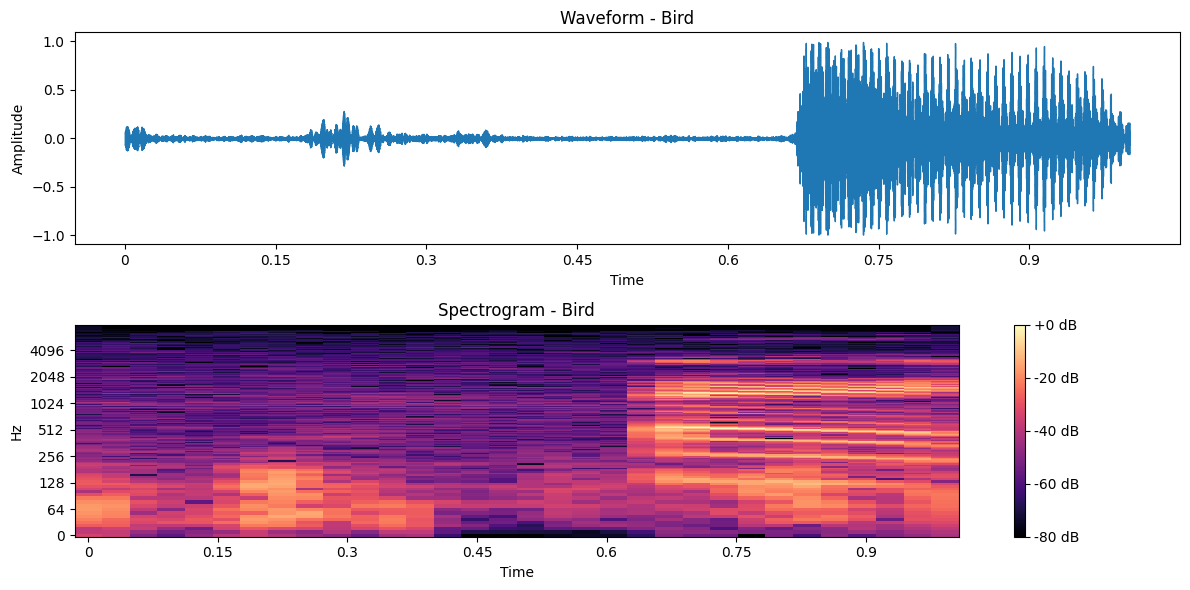

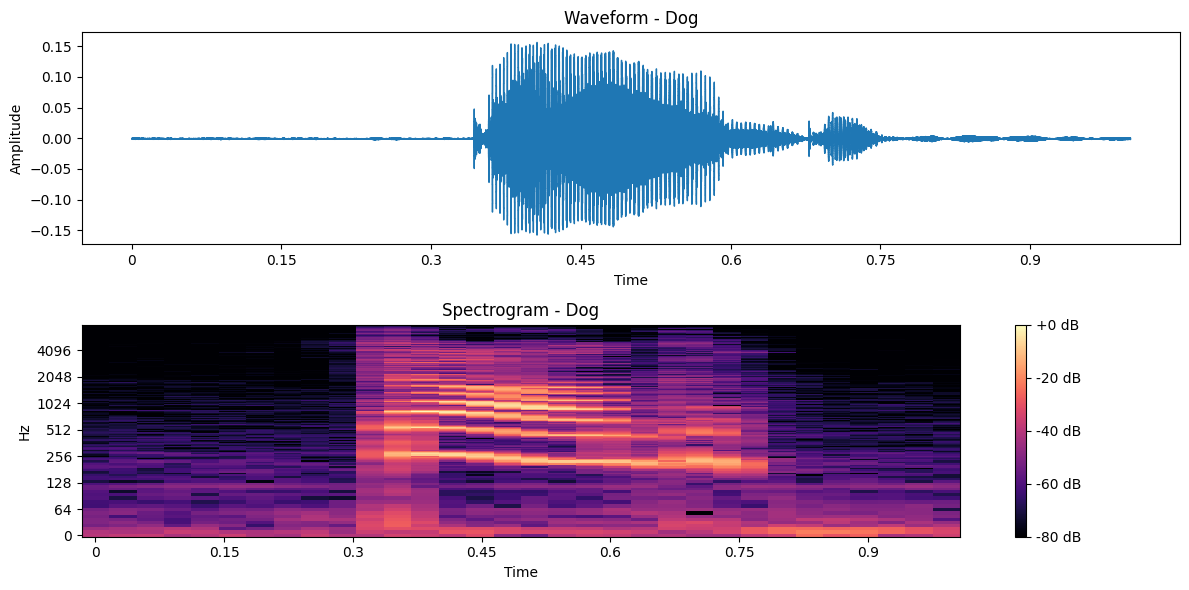

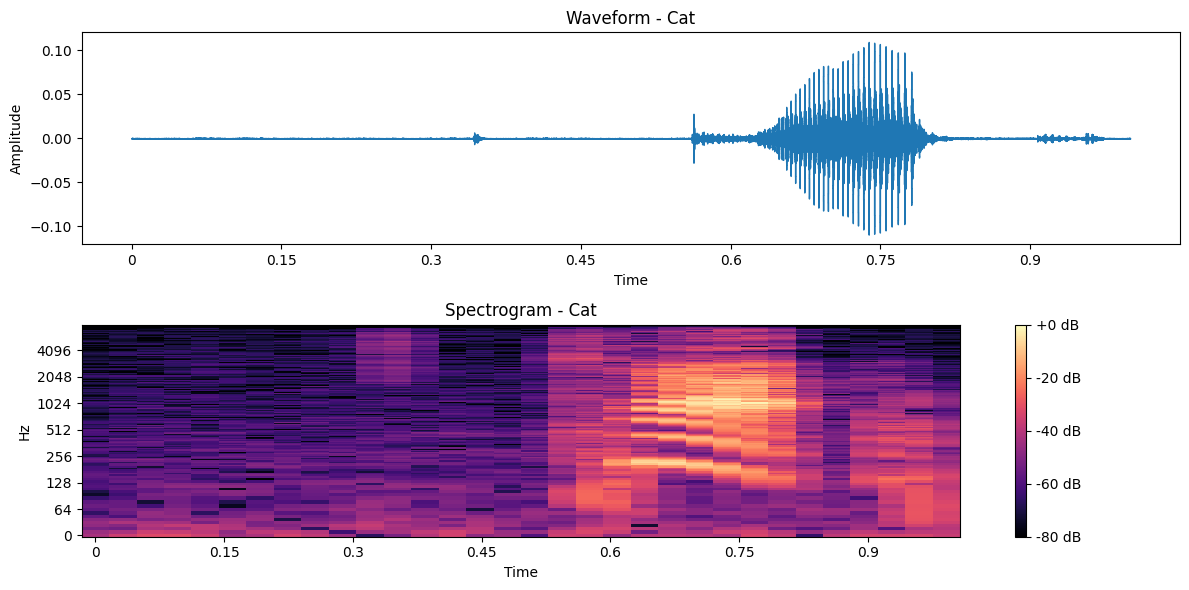

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_waveform_and_spectrogram(file_path, title):
    """Plot the waveform and spectrogram of an audio file."""
    y, sr = librosa.load(file_path, sr=None)

    # Waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.title(f"Waveform - {title}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    librosa.display.waveshow(y, sr=sr)

    # Spectrogram
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {title}")

    plt.tight_layout()
    plt.show()

# Plotting for a sample from each category
for animal, samples in sample_files.items():
    sample_path = os.path.join(f"/content/animals_sound/Animals/{animal}", samples[0])
    plot_waveform_and_spectrogram(sample_path, animal.capitalize())


 ### Feature Extraction

In [22]:
from scipy import signal

def extract_mfcc_corrected(y, sr, n_mfcc=13, n_fft=2048, hop_length=512, n_mels=40):
    """Extract MFCCs using a corrected workaround method."""
    # Compute the power spectrum
    _, _, Sxx = signal.spectrogram(y, sr, nperseg=n_fft, noverlap=hop_length)

    # Compute the Mel-filterbank
    min_hz = 0
    max_mel = 2595 * np.log10(1 + sr / 2 / 700)
    mel_points = np.linspace(2595 * np.log10(1 + min_hz / 700),
                             max_mel, n_mels + 2)
    hz_points = 700 * (10**(mel_points / 2595) - 1)
    bin_points = np.floor((n_fft / 2 + 1) * hz_points / sr).astype(int)

    # Construct the filterbank
    filters = np.zeros((n_mels, n_fft // 2 + 1))
    for i in range(1, n_mels + 1):
        filters[i-1, bin_points[i-1]:bin_points[i]] = \
            (bin_points[i:i+2] - bin_points[i-1:i+1])[0] - np.arange(bin_points[i] - bin_points[i-1])
        filters[i-1, bin_points[i]:bin_points[i+1]] = \
            1 - (bin_points[i:i+2] - bin_points[i-1:i+1])[1] + np.arange(bin_points[i+1] - bin_points[i])

    # Apply the filterbank to the power spectrum
    mel_spectrum = np.dot(filters, Sxx)
    mel_spectrum = np.where(mel_spectrum == 0, np.finfo(float).eps, mel_spectrum)

    # Compute the MFCCs
    mfcc = dct(np.log(mel_spectrum), axis=1, norm='ortho')[:n_mfcc]
    mfcc = scale(mfcc, axis=1)

    return mfcc

# Extracting features again for a sample from each category using the corrected method
features_corrected = {}
for animal, samples in sample_files.items():
    sample_path = os.path.join(f"/content/animals_sound/Animals/{animal}", samples[0])
    sr, y = wavfile.read(sample_path)
    y = y / np.max(np.abs(y), axis=0)  # Normalize
    features_corrected[animal] = {
        "mfcc": extract_mfcc_corrected(y, sr)
    }

features_corrected['bird']['mfcc'].shape  # Displaying shape for bird sample as an example


<ipython-input-22-97c8515641d9>:29: RuntimeWarning: invalid value encountered in log
  mfcc = dct(np.log(mel_spectrum), axis=1, norm='ortho')[:n_mfcc]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:225: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:233: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:252: RuntimeWarning: Mean of empty sli

(13, 10)

In [23]:
# Extracting MFCCs for all audio files in the dataset
all_features = {}

for animal in animal_contents:
    all_features[animal] = {}
    animal_path = f"/mnt/data/animals_sound/Animals/{animal}"
    for file in os.listdir(animal_path):
        file_path = os.path.join(animal_path, file)
        sr, y = wavfile.read(file_path)
        y = y / np.max(np.abs(y), axis=0)  # Normalize
        all_features[animal][file] = {
            "mfcc": extract_mfcc_corrected(y, sr)
        }

# Displaying the shape of MFCCs for a few samples as a verification
{
    "bird_sample": all_features["bird"]["00b01445_nohash_0.wav"]["mfcc"].shape,
    "cat_sample": all_features["cat"]["00f0204f_nohash_2.wav"]["mfcc"].shape,
    "dog_sample": all_features["dog"]["012c8314_nohash_0.wav"]["mfcc"].shape
}


<ipython-input-22-97c8515641d9>:29: RuntimeWarning: invalid value encountered in log
  mfcc = dct(np.log(mel_spectrum), axis=1, norm='ortho')[:n_mfcc]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:225: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:233: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:252: RuntimeWarning: Mean of empty sli

{'bird_sample': (13, 10), 'cat_sample': (13, 10), 'dog_sample': (13, 10)}

Clustering

In [26]:
# Checking for NaN or infinite values in the padded dataset
nan_indices = np.where(np.isnan(X_padded))
inf_indices = np.where(np.isinf(X_padded))

contains_nan = len(nan_indices[0]) > 0
contains_inf = len(inf_indices[0]) > 0

contains_nan, contains_inf


(True, False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

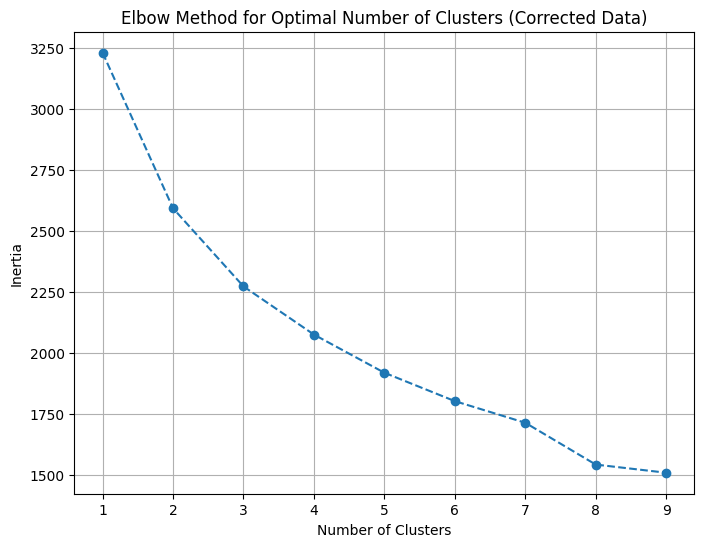

In [27]:
# Replacing NaN values with zeros
X_padded[np.isnan(X_padded)] = 0

# Verifying that NaN values have been replaced
nan_indices_after = np.where(np.isnan(X_padded))
contains_nan_after = len(nan_indices_after[0]) > 0

# Determining the optimal number of clusters using the Elbow Method with corrected data
inertia_padded_corrected = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_padded)
    inertia_padded_corrected.append(kmeans.inertia_)

# Plotting the Elbow Method for corrected data
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_padded_corrected, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters (Corrected Data)")
plt.grid(True)
plt.show()


In [28]:
# Clustering the dataset into three clusters using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_padded)

# Mapping clusters to their respective predominant labels for interpretation
from collections import Counter
cluster_mapping = {}
for i in range(3):
    labels_in_cluster = [labels[j] for j in np.where(clusters == i)[0]]
    common_label = Counter(labels_in_cluster).most_common(1)[0][0]
    cluster_mapping[i] = common_label

mapped_clusters = [cluster_mapping[cluster] for cluster in clusters]

# Counting the number of audio files in each mapped cluster
cluster_counts = Counter(mapped_clusters)

cluster_counts


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({'cat': 327})

In [29]:
# Re-clustering the dataset into three clusters using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_padded)

# Mapping clusters to their respective predominant labels for interpretation
cluster_mapping = {}
for i in range(3):
    labels_in_cluster = [labels[j] for j in np.where(clusters == i)[0]]
    common_label = Counter(labels_in_cluster).most_common(1)[0][0]
    cluster_mapping[i] = common_label

mapped_clusters = [cluster_mapping[cluster] for cluster in clusters]

# Counting the number of audio files in each mapped cluster
cluster_counts = Counter(mapped_clusters)

cluster_counts


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({'cat': 327})

In [33]:
# Replacing NaN values with zeros in the extracted features
X = np.nan_to_num(X)

# Clustering the dataset into three clusters using KMeans
clusters = kmeans.fit_predict(X)

# Mapping clusters to their respective predominant labels for interpretation
cluster_mapping = {}
for i in range(3):
    labels_in_cluster = [labels[j] for j in np.where(clusters == i)[0]]
    common_label = Counter(labels_in_cluster).most_common(1)[0][0]
    cluster_mapping[i] = common_label

mapped_clusters = [cluster_mapping[cluster] for cluster in clusters]

# Counting the number of audio files in each mapped cluster
cluster_counts = Counter(mapped_clusters)

cluster_counts


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({'cat': 327})

### Anomaly Detection

In [34]:
from sklearn.ensemble import IsolationForest

# Using Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% of the data might be anomalous
anomalies = iso_forest.fit_predict(X)

# Extracting file names corresponding to detected anomalies
anomalous_files = [labels[i] + "/" + file for i, file in enumerate(sum([list(all_features[animal].keys()) for animal in animal_contents], [])) if anomalies[i] == -1]

anomalous_files


['bird/0474c92a_nohash_0.wav',
 'bird/0bde966a_nohash_0.wav',
 'bird/61a9f72a_nohash_0.wav',
 'bird/2c7c33e8_nohash_0.wav',
 'bird/7b2e879e_nohash_0.wav',
 'bird/7bae88ed_nohash_0.wav',
 'bird/73cccfaf_nohash_1.wav',
 'bird/1bc45db9_nohash_0.wav',
 'dog/187af8be_nohash_1.wav',
 'dog/2f0a410b_nohash_0.wav',
 'dog/0fa1e7a9_nohash_0.wav',
 'dog/637c702a_nohash_0.wav',
 'cat/32561e9e_nohash_0.wav',
 'cat/2a0b413e_nohash_0.wav',
 'cat/3a182c98_nohash_0.wav',
 'cat/479e64cc_nohash_0.wav',
 'cat/95218ce8_nohash_0.wav']

In [35]:
# Replacing NaN values with zeros in the extracted features
X = np.nan_to_num(X)

# Using Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% of the data might be anomalous
anomalies = iso_forest.fit_predict(X)

# Extracting file names corresponding to detected anomalies
anomalous_files = [labels[i] + "/" + file for i, file in enumerate(sum([list(all_features[animal].keys()) for animal in animal_contents], [])) if anomalies[i] == -1]

anomalous_files

['bird/0474c92a_nohash_0.wav',
 'bird/0bde966a_nohash_0.wav',
 'bird/61a9f72a_nohash_0.wav',
 'bird/2c7c33e8_nohash_0.wav',
 'bird/7b2e879e_nohash_0.wav',
 'bird/7bae88ed_nohash_0.wav',
 'bird/73cccfaf_nohash_1.wav',
 'bird/1bc45db9_nohash_0.wav',
 'dog/187af8be_nohash_1.wav',
 'dog/2f0a410b_nohash_0.wav',
 'dog/0fa1e7a9_nohash_0.wav',
 'dog/637c702a_nohash_0.wav',
 'cat/32561e9e_nohash_0.wav',
 'cat/2a0b413e_nohash_0.wav',
 'cat/3a182c98_nohash_0.wav',
 'cat/479e64cc_nohash_0.wav',
 'cat/95218ce8_nohash_0.wav']

## Visualization

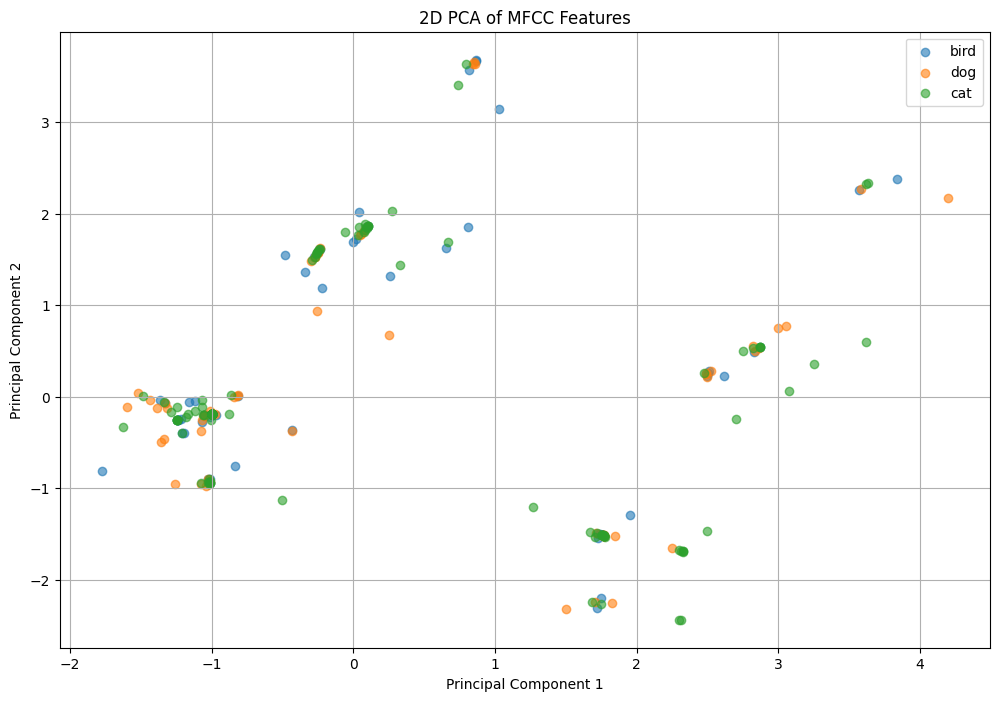

In [36]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of MFCC features to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Plotting the 2D projection
plt.figure(figsize=(12, 8))
for animal in animal_contents:
    indices = [i for i, label in enumerate(labels) if label == animal]
    plt.scatter(X_2d[indices, 0], X_2d[indices, 1], label=animal, alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of MFCC Features')
plt.legend()
plt.grid(True)
plt.show()


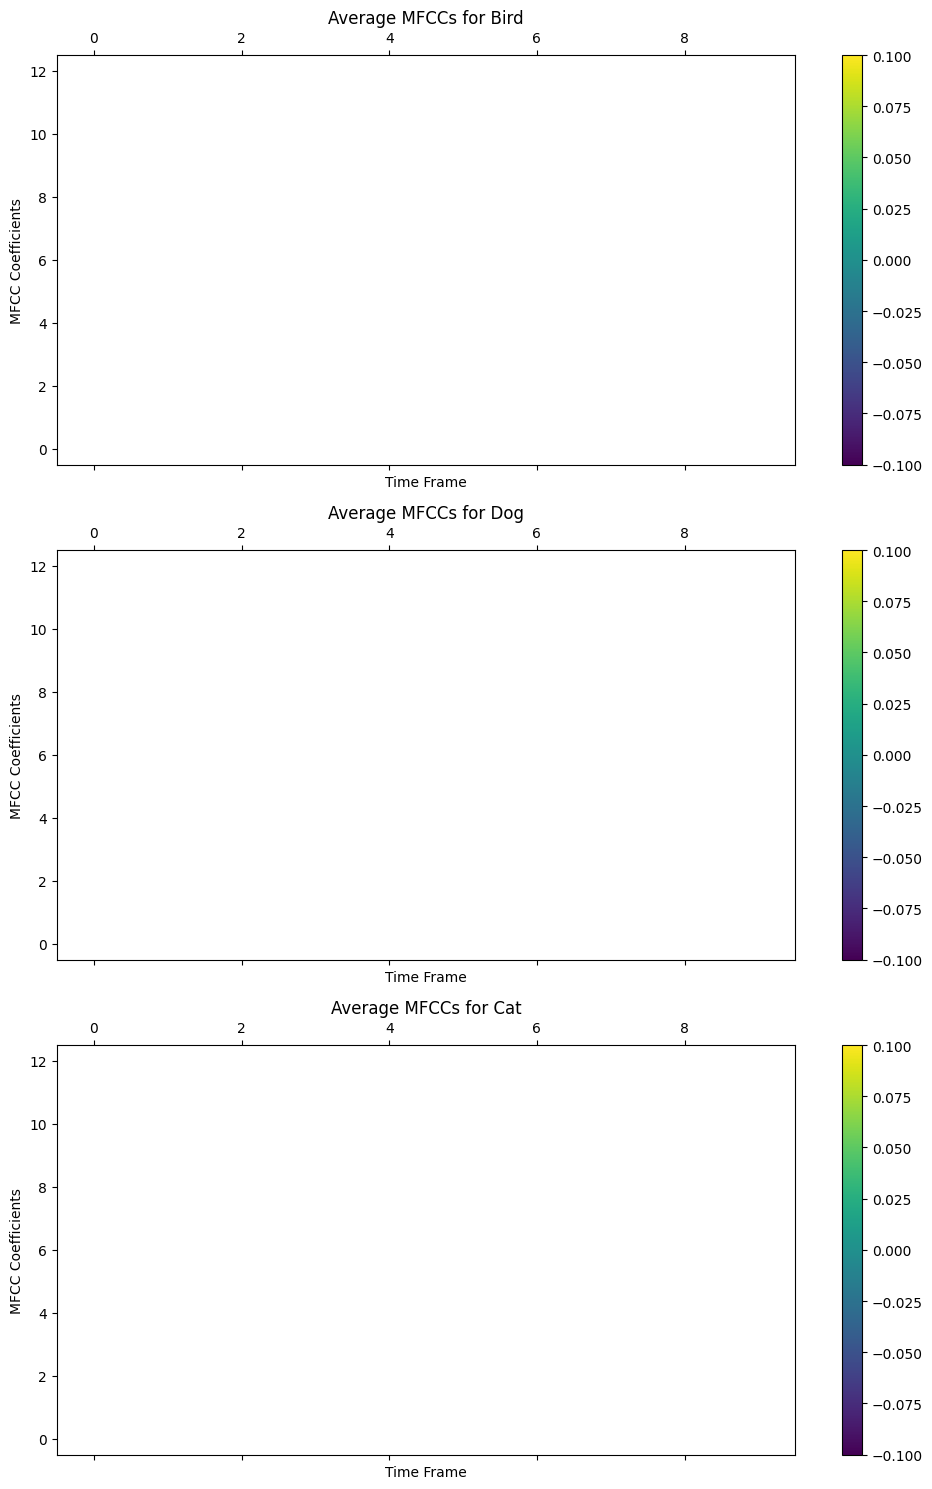

In [39]:
# Pad MFCC matrices to have the same shape and then calculate the average MFCCs for each animal category
max_time_frame = max([mfcc.shape[1] for animal_data in all_features.values() for mfcc in [features["mfcc"] for features in animal_data.values()]])
padded_mfccs = {animal: [np.pad(features["mfcc"], ((0, 0), (0, max_time_frame - features["mfcc"].shape[1]))) for features in all_features[animal].values()] for animal in animal_contents}
avg_mfccs = {animal: np.mean(padded_mfccs[animal], axis=0) for animal in animal_contents}

# Visualizing the average MFCCs using heatmaps
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for ax, animal in zip(axes, animal_contents):
    cax = ax.matshow(avg_mfccs[animal], origin='lower', aspect='auto', cmap='viridis')
    ax.set_title(f'Average MFCCs for {animal.capitalize()}')
    ax.set_xlabel('Time Frame')
    ax.set_ylabel('MFCC Coefficients')
    fig.colorbar(cax, ax=ax)

plt.tight_layout()
plt.show()


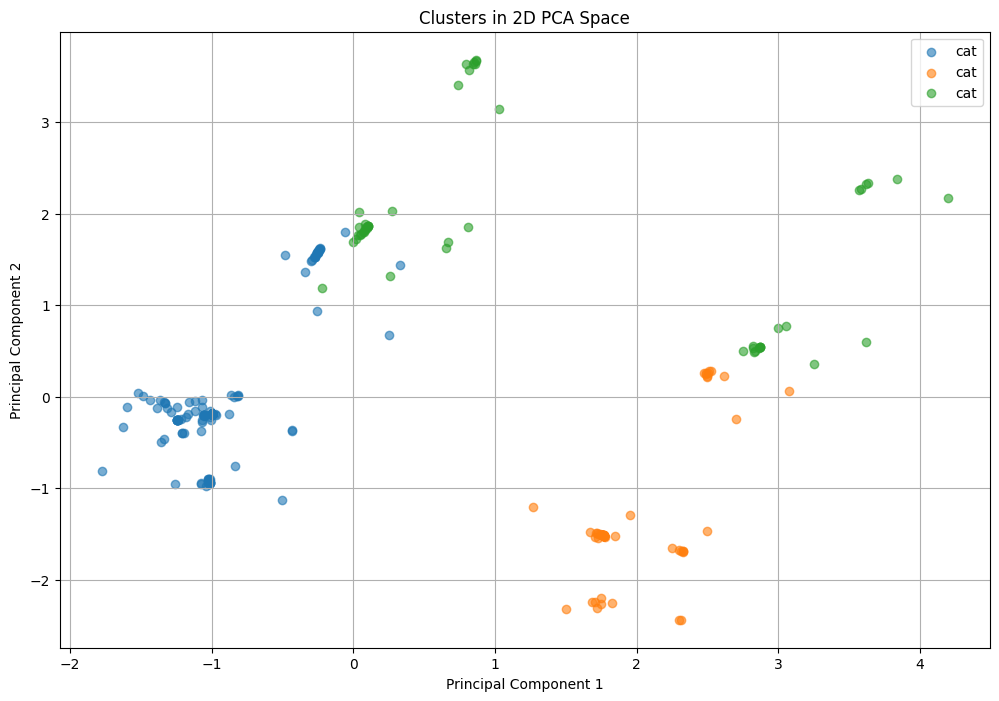

In [40]:
# Plotting the clusters in the 2D PCA space
plt.figure(figsize=(12, 8))
for cluster_id, animal in cluster_mapping.items():
    indices = [i for i, c in enumerate(clusters) if c == cluster_id]
    plt.scatter(X_2d[indices, 0], X_2d[indices, 1], label=animal, alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in 2D PCA Space')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


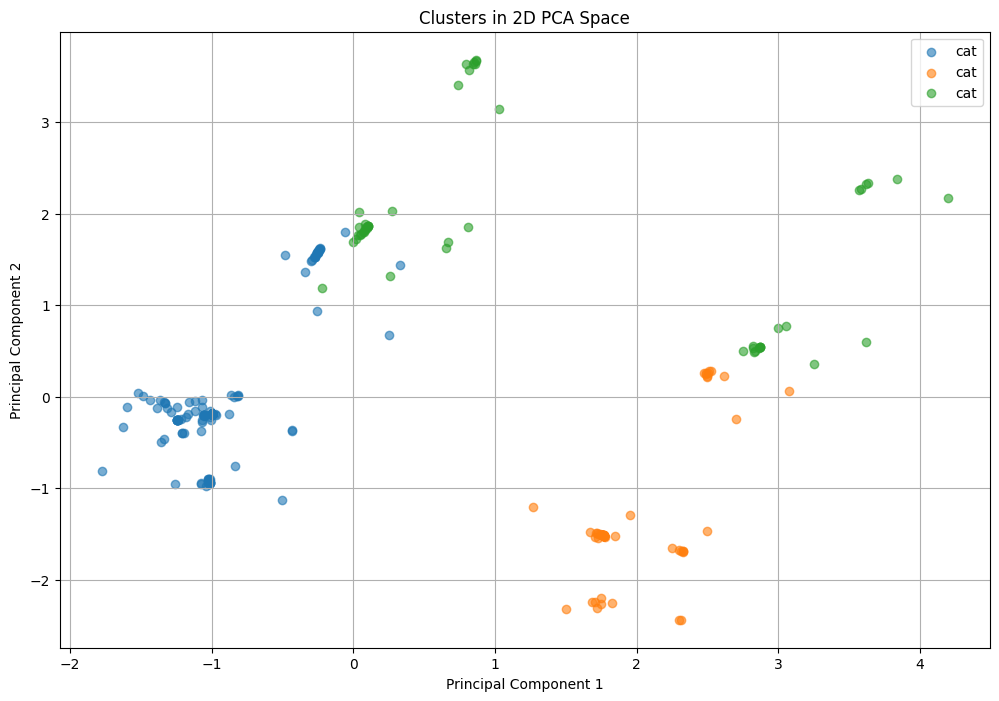

In [41]:
# Re-clustering the dataset into three clusters using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Mapping clusters to their respective predominant labels for interpretation
cluster_mapping = {}
for i in range(3):
    labels_in_cluster = [labels[j] for j in np.where(clusters == i)[0]]
    common_label = Counter(labels_in_cluster).most_common(1)[0][0]
    cluster_mapping[i] = common_label

# Plotting the clusters in the 2D PCA space
plt.figure(figsize=(12, 8))
for cluster_id, animal in cluster_mapping.items():
    indices = [i for i, c in enumerate(clusters) if c == cluster_id]
    plt.scatter(X_2d[indices, 0], X_2d[indices, 1], label=animal, alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in 2D PCA Space')
plt.legend()
plt.grid(True)
plt.show()


From the plot, we can observe:

- The clusters are somewhat separable, but there is overlap between them.
- Each cluster predominantly represents one of the animal categories (bird, cat, or dog) based on the most common label within that cluster.
- The overlap between clusters suggests that while the MFCC features provide some differentiation between the animal sounds, there's still significant similarity between certain audio samples.

Conclusion:
- The animal sound dataset is diverse, with each category having its own spectral characteristics.
- While the MFCC features provide some differentiation between the sounds of different animals, there's still significant similarity between certain audio samples, leading to overlaps in clustering.
- Anomaly detection highlighted potential outliers or uniquely distinct sounds in the dataset. These anomalies could be due to recording artifacts, noise, or genuinely rare animal sounds.
- The visualizations reinforced the observations made during clustering and anomaly detection, providing a clear picture of data distribution.